In [2]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from time import time

In [18]:
def z3(x):
    return np.sin(3*x) - 0.5

def f(x):
    return ((z3(x))**2+(z3(x))**3-200*(z3(x))**4)*np.sin(100000*(x+0.5))

def z3_cp(x):
    return cp.sin(3*x) - 0.5

def f_cp(x):
    return ((z3_cp(x))**2+(z3_cp(x))**3-200*(z3_cp(x))**4)*cp.sin(100000*(x+0.5))

In [4]:
Range = 10000000
x = np.linspace(0, 1, Range)

In [5]:
f = f(x)

In [6]:
fmin = np.min(f)
fmax = np.max(f)
d = (fmax - fmin)/10
print(fmin, fmax, d)

-12.365544666168107 12.374912294071224 2.474045696023933


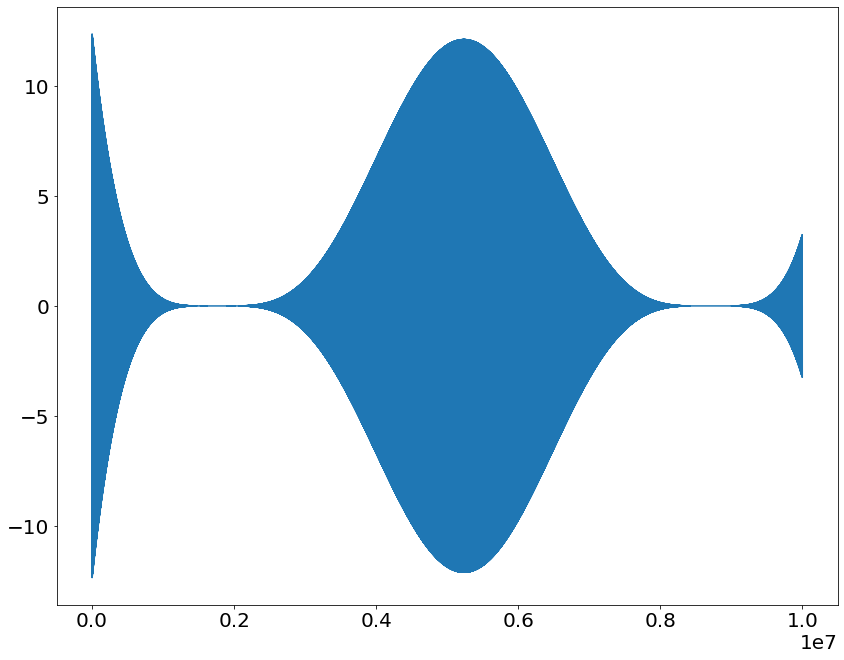

In [7]:
plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
plt.plot(f)

In [8]:
f_arr = np.array(np.split(f, 10))

In [9]:
f_arr[1].shape

(1000000,)

In [10]:
f_set = []
for n in range(10):
    print(fmin + d*(n+1))
    b = f[f[:] >= fmin + d*n]
    f_set.append(b[b[:] <= fmin + d*(n+1)])
 # Check if we split correctly

-9.891498970144173
-7.417453274120241
-4.943407578096308
-2.4693618820723753
0.0046838139515568145
2.4787295099754907
4.952775205999425
7.426820902023357
9.900866598047289
12.37491229407122


In [11]:
f_ar = np.array(f_set)

([array([2.43098e+05, 5.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
  array([0.00000e+00, 3.28176e+05, 1.80000e+01, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
  array([0.00000e+00, 0.00000e+00, 4.23858e+05, 1.60000e+01, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
  array([0.00000e+00, 0.00000e+00, 0.00000e+00, 6.29222e+05, 4.70000e+01,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
  array([      0.,       0.,       0.,       0., 4161957.,    4673.,
               0.,       0.,       0.,       0.]),
  array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 2.587705e+06, 6.300000e+01, 0.000000e+00,
         0.000000e+00, 0.000000e+00]),
  array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 6.27819e+05, 5.

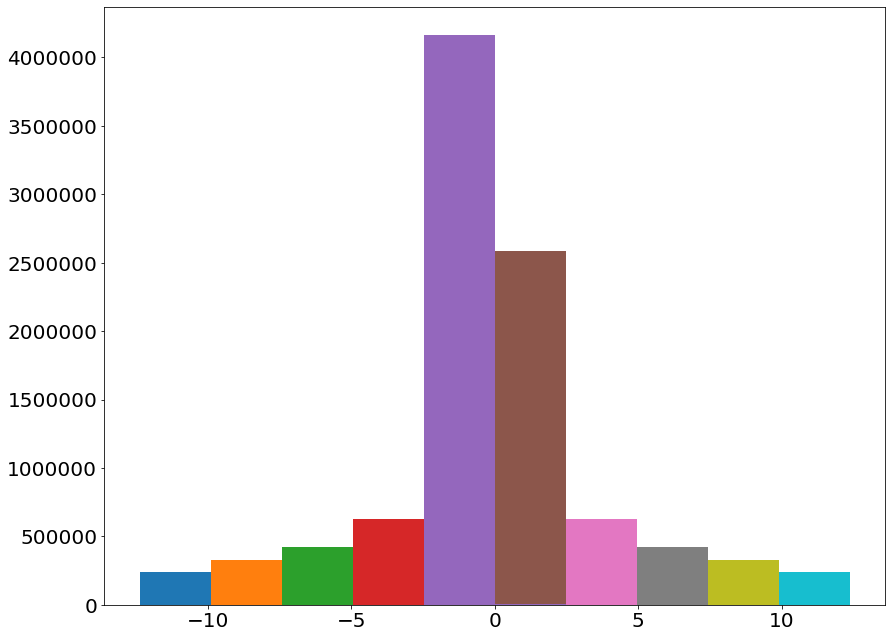

In [12]:
plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
plt.hist(f_set, histtype=u'stepfilled')

In [24]:
import time

N = 10000000

time_start = time.time()

x_linspace = np.linspace(0, 1, N)
Range = f(x_linspace)
f_min = np.min(Range)
f_max = np.max(Range)
d = (f_max - f_min) / 10
summ_ = []
for i in range(10):
    summ_.append(cp.sum((Range - f_max + (i + 1) * d) // d == 0))
delta_np = time.time() - time_start
print('Numpy:', delta_np)

time_start = time.time()
x_linspace = cp.linspace(0, 1, N)
Range = f_cp(x_linspace)
f_min = cp.min(Range)
f_max = cp.max(Range)
d = (f_max - f_min) / 10
summ_ = []
for i in range(10):
    summ_.append(cp.sum((Range - f_max + (i + 1) * d) // d == 0))
delta_cp = time.time() - time_start
print('CuPy:', delta_cp)

Numpy: 2.822105884552002
CuPy: 0.009712457656860352


In [26]:
print(delta_cp / delta_np * 100)

0.3441563872576725
